In [1]:
from array import array
import math
import numpy as np
from scipy import stats

In [2]:
def generator_function(x,par):
    return par[0]+par[1]*x

In [3]:
m = 1 #Set the order of the polynomial
n = 10 #Set the number of data points
#jitter = array('d')
#jitter = [-.2,.2,-.1,.1,.0,-.2,.2,-.1,.1,.0,-.2,.2,-.1,.1,.0]
jitter = array('d')
jitter = [.3,.2,-.5,-.2,.2,.6,-.4,-1.5,.7,.5]
#jitter = array('d')
#jitter = [.0,.0,.0,.0,.0,.0,.0,.0,.0,.0,.0,.0,.0,.0,.0]
#growing errors
#sigma = array('d')
#sigma = [7,6,5,4,3,2,1,.5,1,2,3,4,5,6,7]
#constraining endpoints
#sigma = array('d')
#sigma = [.7,6,5,4,3,2,1,.5,1,2,3,4,5,6,.7]
#determining zero crossing
#sigma = array('d')
#sigma = [1,2,3,4,5,6,7,8,7,6,5,4,3,2,1]
#positive values - slope
#sigma = array('d')
#sigma = [1,1,2,2,3,3,4,4,5,5,6,6,7,7,8]
#positive values - intercept
#sigma = array('d')
#sigma = [8,7,7,6,6,5,5,4,4,3,3,2,2,1,1]
#positive values - slope
sigma = array('d')
sigma = [0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51]

In [4]:
x = array('d')
y = array('d')
ex = array('d')
ey = array('d')

In [5]:
par = array('d')
par.append(6.81)
par.append(0.658)
par.append(0.002)

for i in range(0,n):
    #x.append(-4.0+8.0*i/n)
    #x.append(0.0+8.0*i/n)
    x.append(41.0+i*1.0)
    y.append(generator_function(x[i],par)+jitter[i])
    ex.append(0.0)
    ey.append(sigma[i])

In [6]:
m_params = m + 1
a = np.zeros(shape = (m_params,m_params))
v = np.zeros(shape = (m_params,1))

In [7]:
for k in range(0,m_params):
    for i in range(0,n):
        v[k][0]=v[k][0]+y[i]*math.pow(x[i],k)/math.pow(ey[i],2)
    #print ("v[%d] = %f" % (k,v[k][0]))
    for j in range(0,m_params):
        for i in range(0,n):
            a[k][j]=a[k][j]+math.pow(x[i],k+j)/math.pow(ey[i],2)
        #print ("a[%d][%d] = %f" %(k,j,a[k][j]))
        
print ("A matrix = ")        
print (a)
print("V matrix = ")
print (v)

ainv = np.linalg.inv(a)
u1 = np.dot(a,ainv)

print ("A_inverse = ")
print (ainv)
print ("Diagonal Check:")
print (u1)
coeff = ainv*np.matrix(v)
print ("Coefficients:")
print (coeff)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print (r_value)

A matrix = 
[[3.84467512e+01 1.74932718e+03]
 [1.74932718e+03 7.99115725e+04]]
V matrix = 
[[ 1412.49519416]
 [64477.43175702]]
A_inverse = 
[[ 6.55294364e+00 -1.43449091e-01]
 [-1.43449091e-01  3.15272727e-03]]
Diagonal Check:
[[ 1.00000000e+00 -5.74188209e-16]
 [-5.26297255e-13  1.00000000e+00]]
Coefficients:
[[6.77242424]
 [0.65860606]]
0.9487689819488618


In [13]:
yfit = 0
chi2 = 0
rho = array('d')

for i in range(0,n):
    for j in range(0,m+1):
        yfit = yfit + coeff[j]*math.pow(x[i],j)
    print ("i = %d  y = %f  yfit = %f" % (i,y[i],yfit))
    chi2 = chi2 + math.pow(((yfit-y[i])/ey[i]),2)
    yfit = 0
    
chi2perdof = chi2/(n-m)
print ("chi2/dof = %f / %f" % (chi2,(n-m-1)))

R = np.corrcoef(ainv)
print (R)

corr, _ = stats.pearsonr(x, y)
print('Pearsons correlation: %.5f' % corr)

i = 0  y = 34.088000  yfit = 33.775273
i = 1  y = 34.646000  yfit = 34.433879
i = 2  y = 34.604000  yfit = 35.092485
i = 3  y = 35.562000  yfit = 35.751091
i = 4  y = 36.620000  yfit = 36.409697
i = 5  y = 37.678000  yfit = 37.068303
i = 6  y = 37.336000  yfit = 37.726909
i = 7  y = 36.894000  yfit = 38.385515
i = 8  y = 39.752000  yfit = 39.044121
i = 9  y = 40.210000  yfit = 39.702727
chi2/dof = 15.259399 / 8.000000
[[ 1. -1.]
 [-1.  1.]]
Pearsons correlation: 0.94877


In [9]:
for k in range(0,m+1):
    print("k = %d, err = %f" % (k,math.pow(ainv[k][k],0.5)))

k = 0, err = 2.559872
k = 1, err = 0.056149


In [10]:
xfiterr = array('d')
yfitplus = array('d')
yfitminus = array('d')

rho = np.zeros(shape = (m_params,m_params))

for k in range(0,m+1):
    for j in range(0,m+1):
        #rho[k][j] = math.pow(-1.0,(k+j))
        rho[k][j] = R[k][j]

for i in range(0,2*n):
    #xfiterr.append(-5.0+10.0*i/100)
    #xfiterr.append(0.0+10.0*i/100)
    xfiterr.append(41.0+i*0.5)
    yerror = 0.0
    yval = 0.0
    for k in range(0,m+1):
        for j in range(0,m+1):
            term = rho[k][j]*math.pow(xfiterr[i],k)*math.pow(ainv[k][k],0.5)*(math.pow(xfiterr[i],j)*math.pow(ainv[j][j],0.5))
            print (k,j,term)
            yerror = yerror + term
        yval = yval + coeff[k]*math.pow(xfiterr[i],k)
    yfitplus.append(yval+math.sqrt(yerror))
    yfitminus.append(yval-math.sqrt(yerror))
    print(i,xfiterr[i],yval,math.sqrt(yerror),yfitplus[i],yfitminus[i])

0 0 6.5529436363636755
0 1 -5.893119866764402
1 0 -5.893119866764402
1 1 5.299734545454575
0 41.0 [[33.77527273]] 0.25775656788808743 34.03302929516004 33.51751615938387
0 0 6.5529436363636755
0 1 -5.964987182212749
1 0 -5.964987182212749
1 1 5.429784545454576
1 41.5 [[34.10457576]] 0.229681991877366 34.334257749452355 33.87489376569763
0 0 6.5529436363636755
0 1 -6.036854497661095
1 0 -6.036854497661095
1 1 5.561410909090942
2 42.0 [[34.43387879]] 0.20160741586664496 34.63548620374468 34.23227137201138
0 0 6.5529436363636755
0 1 -6.108721813109441
1 0 -6.108721813109442
1 1 5.694613636363669
3 42.5 [[34.76318182]] 0.17353283985592194 34.93671465803699 34.589648978325144
0 0 6.5529436363636755
0 1 -6.180589128557788
1 0 -6.180589128557788
1 1 5.82939272727276
4 43.0 [[35.09248485]] 0.14545826384519883 35.237943112329305 34.947026584638905
0 0 6.5529436363636755
0 1 -6.2524564440061345
1 0 -6.2524564440061345
1 1 5.965748181818216
5 43.5 [[35.42178788]] 0.11738368783447939 35.5391715666

Welcome to JupyROOT 6.16/00
Fit 1: 13.749490 7.000000 



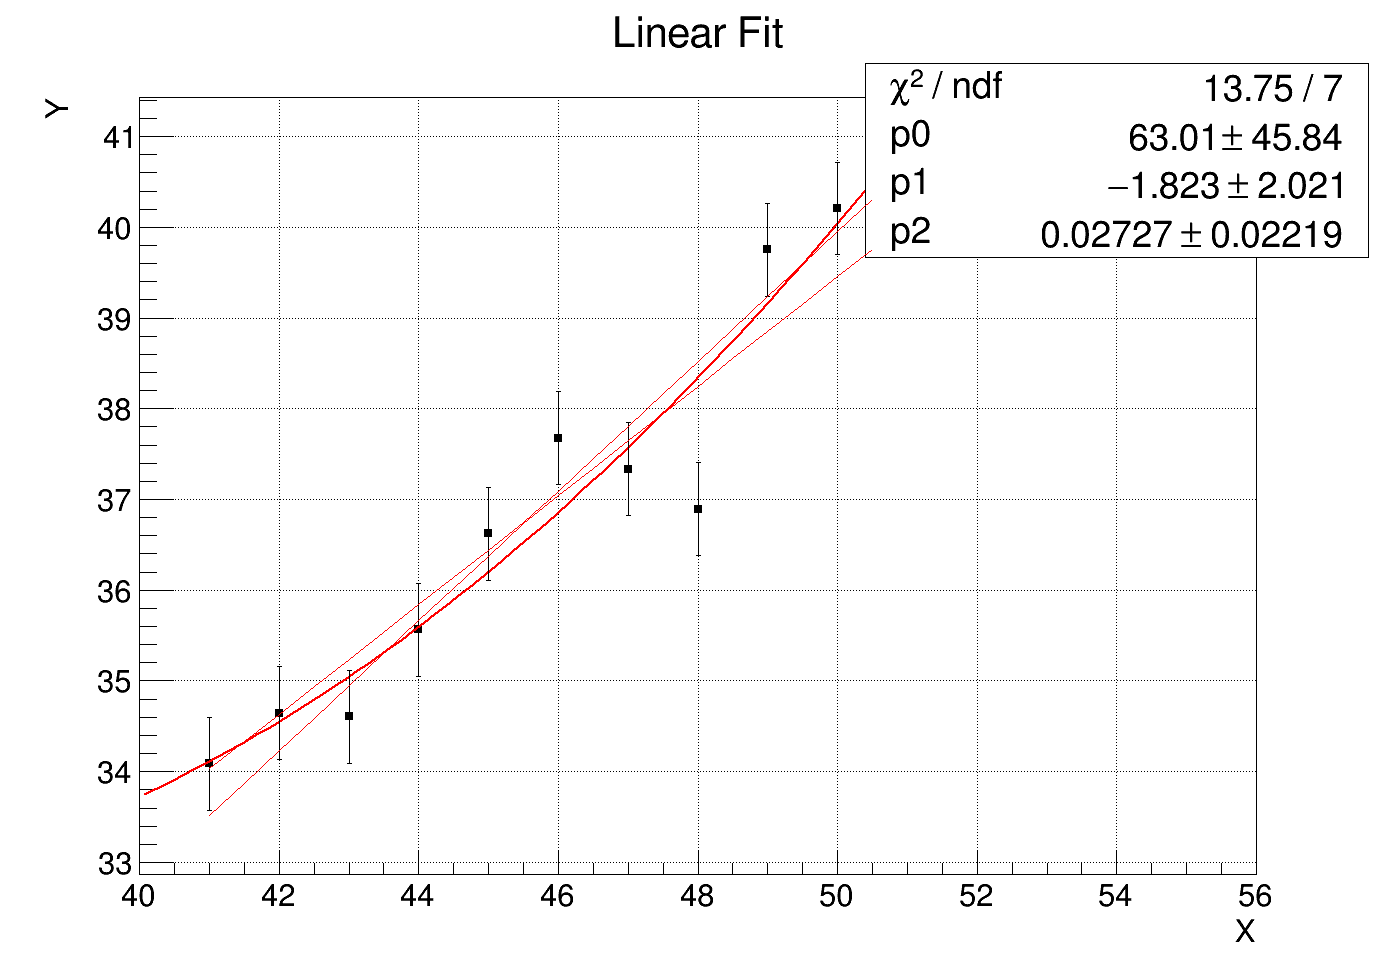

In [11]:
#print (n,x,y)

from ROOT import TCanvas, TFile
from ROOT import TGraph, TF1, TGraphErrors
from ROOT import gStyle
gStyle.SetOptFit(1)

c1 = TCanvas( 'c1', 'Simple Linear Fitting Example', 200, 10, 1400, 1000 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )

gr = TGraphErrors(n,x,y,ex,ey)
grp = TGraph(2*n,xfiterr,yfitplus)
grm = TGraph(2*n,xfiterr,yfitminus)

pfit1 = TF1("pfit1","pol2")
gr.SetMarkerStyle(21)
gr.SetTitle("Linear Fit")
gr.GetXaxis().SetTitle("X")
gr.GetYaxis().SetTitle("Y")
gr.GetXaxis().SetLimits(40.0,56.0)
gr.Fit("pfit1","q")
pfit1chi2 = pfit1.GetChisquare()
pfit1ndf = pfit1.GetNDF()
pfit1chi2ndf = pfit1chi2/pfit1ndf
print("Fit 1: %f %f \n" % (pfit1chi2,pfit1ndf))
gr.Draw("AP")
grp.SetLineColor(2)
grm.SetLineColor(2)
grp.Draw("L")
grm.Draw("L")
c1.Draw()